## COA Points Analysis 

***

> Link for COA Data - http://www2.cao.ie/points/l8.php


NOTE: This has now been changed and the data is listed as a spreadsheet - 30.11


Pages:

> http://www.i18nqa.com/debug/table-iso8859-1-vs-windows-1252.html

> https://docs.python.org/3/library/datetime.html

> https://decimaltobinary.pro/_hexadecimal__FC_in_binary_


In [1]:
# imports

import re

import requests as rq

import datetime as dt

In [2]:
# get the CAO data

resp = rq.get('http://www2.cao.ie/points/l8.php')

# have a look at the data - as per the last notebook 200 means this is all ok
# 404 would mean it is not found

resp

<Response [200]>

In [3]:
resp.encoding  # this will not be correct

'iso-8859-1'

*****

## Save the original dataset

> https://docs.python.org/3/library/datetime.html


In [4]:
# you need to have imported datetime
# get the current date and time


dt.datetime.now()

datetime.datetime(2021, 11, 30, 20, 26, 27, 267335)

In [5]:
now = dt.datetime.now()

nowstr = now.strftime('%y%m%d_%H%M%S')

In [6]:
print(now)

2021-11-30 20:26:27.369755


In [7]:
now.strftime('%y%m%d_%H%M%S')  # print time to this time structure output

'211130_202627'

In [8]:
# for programming you should only use alpha numeric characters, dots and underscores in your filenames
# create a file path for the original data

'data/cao2021_' + nowstr + '.csv'

'data/cao2021_211130_202627.csv'

In [9]:
resp.encoding

'iso-8859-1'

In [10]:
# change in the encoding - encoding is incorrect


original_encoding = resp.encoding

# change encoding

resp.encoding = 'cP1252'

In [11]:
# save the original html file

path = 'Data/cao2021_' + now.strftime('%y%m%d_%H%M%S') + '.html'

with open (path, 'w') as f:
    f.write(resp.text)

## Use Regular Expressions to select data


****

In [12]:
# use regular expressions to extract the data you want to use
# r' string - allows regular expression to be evaluated as it is written not as a string
# we are compiling this - almost like setting a variable as we will use this again and again
# it is our own piece of code for re-use - mini program

re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*)([0-9]{3})(\*?) *')


# [A-Za-z] upper or lower
# [] anything in the sq brackets
# {} number of time of the previous item [A-Z]{2} 2 letters uppercase
# () groups items - treat as unit
# space - no special meaning - it is just space. Space with {50} would mean 50 spaces
# you want the regular expression code to be concise 
# (.*) this is a wild card - . is a wild card, it can mean any character - * any number of times - anything any number of times
# r'.*'  - this means every possible string
# (.*) this eats all between both sets of data we have set out specifically
# * - zero or more of  
# + - one or more of
# ? - zero or more of
# (\*?) - literal * - ? means zero or 1 of - os this is saying actual * or which there maybe zero or 1 of
# \ before the * means literally look for the *
# space * - any number of spaces



******

Note: 
This is not a perfect regular expression of this data - we are missing the requirement to add 
(#?) - catch the # in the data 

<br/>

## Loop through the lines of the response

*****

    loop through the data we got back 	

In [13]:
# keep track of how many courses we process

no_lines = 0

# the loop itself

# for line in the website iterate through the lines
for line in resp.iter_lines(): 
    dline = line.decode('iso-8859-1') # add encoding as a variable
    # match only lines representing courses ( as per our code above)
    if re_course.fullmatch(dline):
        no_lines = no_lines + 1 # count lines
        print(line) # print out the original lines
        # output a csv version to the following specification
        csv_version = re_course.sub(r'\1,\2,\3,\4', dline)
        print(csv_version) # print csv lines
        
print(f"Total number of lines is {no_lines}.")  # The total number of lines is no_lines

b'AL801  Software Design for Virtual Reality and Gaming       300      '
AL801,Software Design for Virtual Reality and Gaming       ,300,
b'AL802  Software Design in Artificial Intelligence for Clo   313      '
AL802,Software Design in Artificial Intelligence for Clo   ,313,
b'AL803  Software Design for Mobile Apps and Connected Devi   350      '
AL803,Software Design for Mobile Apps and Connected Devi   ,350,
b'AL805  Computer Engineering for Network Infrastructure      321      '
AL805,Computer Engineering for Network Infrastructure      ,321,
b'AL810  Quantity Surveying                                   328      '
AL810,Quantity Surveying                                   ,328,
b'AL820  Mechanical and Polymer Engineering                   327      '
AL820,Mechanical and Polymer Engineering                   ,327,
b'AL830  General Nursing                                      451*     444'
AL830,General Nursing                                      451*     ,444,
b'AL832  Mental Health

1. For the above - lines starting with B are the orignal website data. This output is because of the print(line) command. This can be #'d so it doesnt show. When we do show it however it give us the chance to compare what we have inputted against what we have outputted.


2. In the regular expression code we have broken up the parts by using () brackets - if you count this you will see there are 4 sets. These 4 sets correspond to the r'\1,\2,\3,\4 - this allows up to format the csv in the way we want.


3. For places where there is two sets of points we are pulling in the data in the incorrect line


4. Another issues is the emdash and endash - character set issues

Encode takes the byte into an output - a letter or letter with a fada for example. Moves it from byes - numbers - outputs.

In this code we are doing from iso-8859-1 - UTF8

Weird characters from older sites etc will be an issue when we are doing data analysis. CAO used HTML4 - 5 is the current standard.

Sometimes issues can be fixed via code - sometimes you just need to fix the offending data directly.

## Endash Vs Emdash

****

https://www.scribbr.com/language-rules/dashes/#:~:text=There%20are%20two%20types%20of,length%20of%20the%20letter%20m.&text=The%20longer%20em%20dash%20(%E2%80%94),a%20break%20in%20a%20sentence.


This is most likely a mistake in the inputting of the data - on the line CM004 the dash is an em dash, meaning it slightly longer in length than an en dash.

You will see in the image - the fada was handled but the dash wasnt there is a strange output - this image is a comparision from the bytes to output.

The box with the ? means the computer cannot read the input.

When we check the site on the Chrome - right click inspect - network - the character set is iso-8859-1

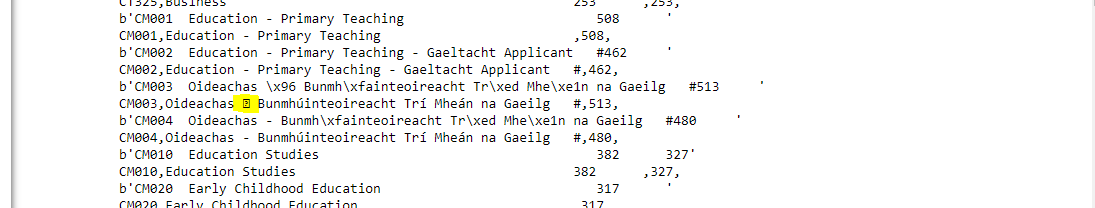

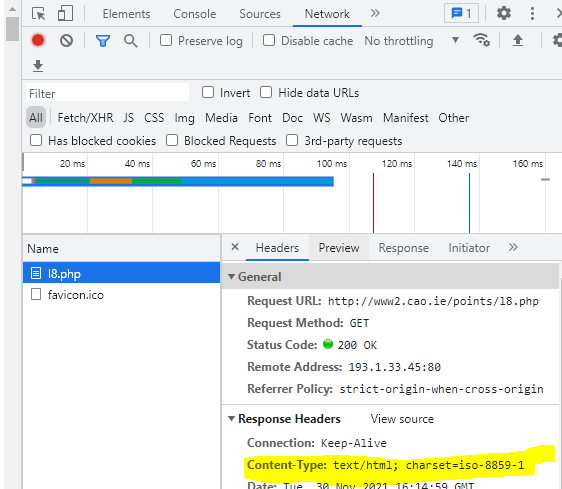

The reality is that this is not the correct form of extended ascii

> http://www.i18nqa.com/debug/table-iso8859-1-vs-windows-1252.html

We will not change this previous decode - it was the incorrect form even though the site said it was correct. 

This all comes down to the different way sites / packaes etc decode language also the different ways people input data.

Data retrieval will be messy and will need to be problem solved.

Trouble shooting and changing data is the real data anaytics

In [14]:
# keep track of how many courses we process

no_lines = 0

# the loop itself

# for line in the website iterate through the lines
for line in resp.iter_lines(): 
    # server says this should be decoded as per iso-8859-1 however another line does not work with this.
    dline = line.decode('cp1252') # add encoding as a variable
    # match only lines representing courses ( as per our code above)
    if re_course.fullmatch(dline):
        no_lines = no_lines + 1 # count lines
        print(line) # print out the original lines
        # output a csv version to the following specification
        csv_version = re_course.sub(r'\1,\2,\3,\4', dline)
        print(csv_version) # print csv lines
        
print(f"Total number of lines is {no_lines}.")  # The total number of lines is no_lines




## line uses \x96 which isnt in iso-8859-1 so we used decoding standard cp1252, which is similiar and decoded this line

b'AL801  Software Design for Virtual Reality and Gaming       300      '
AL801,Software Design for Virtual Reality and Gaming       ,300,
b'AL802  Software Design in Artificial Intelligence for Clo   313      '
AL802,Software Design in Artificial Intelligence for Clo   ,313,
b'AL803  Software Design for Mobile Apps and Connected Devi   350      '
AL803,Software Design for Mobile Apps and Connected Devi   ,350,
b'AL805  Computer Engineering for Network Infrastructure      321      '
AL805,Computer Engineering for Network Infrastructure      ,321,
b'AL810  Quantity Surveying                                   328      '
AL810,Quantity Surveying                                   ,328,
b'AL820  Mechanical and Polymer Engineering                   327      '
AL820,Mechanical and Polymer Engineering                   ,327,
b'AL830  General Nursing                                      451*     444'
AL830,General Nursing                                      451*     ,444,
b'AL832  Mental Health

b'CR365  Environmental Science and Sustainable Technology     262      '
CR365,Environmental Science and Sustainable Technology     ,262,
b'CR370  Agri-Biosciences                                     368      '
CR370,Agri-Biosciences                                     ,368,
b'CR400  Accounting                                           315      '
CR400,Accounting                                           ,315,
b'CR420  Marketing                                            290      '
CR420,Marketing                                            ,290,
b'CR425  International Business with Language                 279      '
CR425,International Business with Language                 ,279,
b'CR430  Sport and Exercise Management                        402      '
CR430,Sport and Exercise Management                        ,402,
b'CR435  Coaching Science and Sports Pedagogy                 410      '
CR435,Coaching Science and Sports Pedagogy                 ,410,
b'CR440  Montessori Education     

WD144,Architecture                                         ,309,
b'WD147  Pharmaceutical Science                               288      '
WD147,Pharmaceutical Science                               ,288,
b'WD150  Criminal Justice Studies                             280      '
WD150,Criminal Justice Studies                             ,280,
b'WD152  Visual Art                                           243      '
WD152,Visual Art                                           ,243,
b'WD161  Computer Forensics and Security                      270      '
WD161,Computer Forensics and Security                      ,270,
b'WD162  Quantity Surveying                                   226      '
WD162,Quantity Surveying                                   ,226,
b'WD163  Psychology                                           456      '
WD163,Psychology                                           ,456,
b'WD186  Sports Coaching and Performance                      261      '
WD186,Sports Coaching and Performa

## Backing Up Data

> https://docs.python.org/3/library/datetime.html




So above we have saved the original data to an outputted CSV file

Now we also need to back up the data we are creating in the notebook



In [15]:
path = 'Data/cao2021_csv_' + now.strftime('%y%m%d_%H%M%S') + '.csv'

no_lines = 0

with open(path, 'w') as f:
    for line in resp.iter_lines():
        dline = line.decode('cp1252')

        if re_course.fullmatch(dline):
            no_lines = no_lines + 1 
            # print(line) 
            csv_version = re_course.sub(r'\1,\2,\3,\4', dline)
            #print(csv_version) 
            f.write(csv_version + '\n')
        
print(f"Total number of lines is {no_lines}.")  

Total number of lines is 922.


Most import point is save the original data - that way you have a copy which can be reviewed again

*****

## Split the Data - Remove the Spaces

****


In [16]:
path = 'Data/cao2021_csv_' + now.strftime('%y%m%d_%H%M%S') + '.csv'

no_lines = 0

with open(path, 'w') as f:
    for line in resp.iter_lines():
        dline = line.decode('cp1252')

        if re_course.fullmatch(dline):
            no_lines = no_lines + 1 
            # print(line) 
            csv_version = re_course.sub(r'\1,\2,\3,\4', dline)
            #print(csv_version) 
            linesplit = re.split('  +', dline)
            #f.write(csv_version + '\n')
            print(linesplit)
        
print(f"Total number of lines is {no_lines}.")  

['AL801', 'Software Design for Virtual Reality and Gaming', '300', '']
['AL802', 'Software Design in Artificial Intelligence for Clo', '313', '']
['AL803', 'Software Design for Mobile Apps and Connected Devi', '350', '']
['AL805', 'Computer Engineering for Network Infrastructure', '321', '']
['AL810', 'Quantity Surveying', '328', '']
['AL820', 'Mechanical and Polymer Engineering', '327', '']
['AL830', 'General Nursing', '451*', '444']
['AL832', 'Mental Health Nursing', '440*', '431']
['AL835', 'Pharmacology', '356', '']
['AL836', 'Nutrition and Health Science', '346', '']
['AL837', 'Sports Science with Exercise Physiology', '357', '']
['AL838', 'Biotechnology', '324', '']
['AL839', 'Microbiology', '325', '']
['AL840', 'Pharmaceutical Sciences', '346', '']
['AL841', 'Athletic and Rehabilitation Therapy', '477', '476*']
['AL842', 'Bioveterinary Science', '338', '']
['AL843', 'Physical Activity and Health Science', '306', '']
['AL849', 'Culinary Entrepreneurship', '297', '']
['AL850', 'Bu

['MI006', 'Education - Primary Teaching - Gaeltacht Applicant', '#485', '']
['MI007', 'Early Childhood Care and Education', '409', '']
['MI008', 'Education and Psychology - Primary Teaching', '590', '']
['MI009', 'Education', 'Business Studies and Accounting', '434', '']
['MI010', 'Education', 'Business Studies and Religious Studies', '370', '']
['MI011', 'Education', 'Gaeilge and Religious Studies', '407', '']
['MI012', 'Education', 'Gaeilge and Business Studies', '387', '']
['MI013', 'Education', 'Mathematics and Gaeilge', '509', '']
['MI014', 'Education', 'Mathematics and Business Studies', '476', '']
['CI110', 'Counselling and Psychotherapy', '292', '']
['CI111', 'Counselling and Psychotherapy with Addiction Studi', '290', '']
['CI112', 'Counselling and Psychotherapy with Youth Studies', '325', '']
['LC110', 'Art and Design (Common Entry', 'portfolio)', '#794', '']
['LC114', 'Fashion and Textiles for Product and Costume (port', '#914', '']
['LC115', 'Art and Design Teacher Educatio

In [17]:
path = 'Data/cao2021_csv_' + now.strftime('%y%m%d_%H%M%S') + '.csv'

no_lines = 0

with open(path, 'w') as f:
    for line in resp.iter_lines():
        dline = line.decode('cp1252')

        if re_course.fullmatch(dline):
            no_lines = no_lines + 1 
            # print(line) 
            csv_version = re_course.sub(r'\1,\2,\3,\4', dline)
            #print(csv_version) 
            linesplit = re.split('  +', dline)
            #f.write(csv_version + '\n')
            # print(linesplit)
            print(",".join(linesplit))
            
        
print(f"Total number of lines is {no_lines}.")  

AL801,Software Design for Virtual Reality and Gaming,300,
AL802,Software Design in Artificial Intelligence for Clo,313,
AL803,Software Design for Mobile Apps and Connected Devi,350,
AL805,Computer Engineering for Network Infrastructure,321,
AL810,Quantity Surveying,328,
AL820,Mechanical and Polymer Engineering,327,
AL830,General Nursing,451*,444
AL832,Mental Health Nursing,440*,431
AL835,Pharmacology,356,
AL836,Nutrition and Health Science,346,
AL837,Sports Science with Exercise Physiology,357,
AL838,Biotechnology,324,
AL839,Microbiology,325,
AL840,Pharmaceutical Sciences,346,
AL841,Athletic and Rehabilitation Therapy,477,476*
AL842,Bioveterinary Science,338,
AL843,Physical Activity and Health Science,306,
AL849,Culinary Entrepreneurship,297,
AL850,Business,309,
AL851,Business and Law,302,
AL852,Accounting,336,
AL854,Sport Management (with international placement),300,299
AL855,Hospitality Management (with international placeme,309,
AL857,Digital Marketing,304,
AL859,International Busi

LM050,Business Studies (options),451,
LM056,International Business,555*,
LM058,Financial Mathematics,468,
LM063,Technology Management,410,
LM066,Environmental Science,430,
LM068,Food Science and Health,464*,
LM076,Product Design and Technology (portfolio required),#401,
LM077,Aeronautical Engineering,567,
LM082,Construction Management and Engineering,446*,
LM089,Sport and Exercise Sciences,498*,
LM090,Physical Education with concurrent Teacher Educati,552,544*
LM091,Languages with concurrent Teacher Education,506,
LM092,Science with Teacher Ed (Biology with Physics/Chem,521,
LM093,Equine Science,367,
LM094,Materials and Architectural Technology with concur,475,
LM095,Materials and Engineering Technology with concurre,425,
LM096,Science with Teacher Ed (Physical Sciences with Ch,454,
LM097,Mathematics and Computer Science with concurrent T,465,
LM099,Architecture,520,
LM100,Physiotherapy,613*,
LM102,Psychology,534,
LM103,Paramedic Studies (Full B/Provisional C1 Drivers L,#429,
LM105,Exe

In [18]:
path = 'Data/cao2021_csv_' + now.strftime('%y%m%d_%H%M%S') + '.csv'

no_lines = 0

with open(path, 'w') as f:
    for line in resp.iter_lines():
        dline = line.decode('cp1252')

        if re_course.fullmatch(dline):
            no_lines = no_lines + 1 
            # print(line) 
            csv_version = re_course.sub(r'\1,\2,\3,\4', dline)
            #print(csv_version) 
            linesplit = re.split('  +', dline)
            f.write(",".join(linesplit) + '\n')
            # print(linesplit)
        
print(f"Total number of lines is {no_lines}.")  

Total number of lines is 922.


note to do 

1. remove * and # from file


2. write file using line splitting to make file